In [5]:
import pandas as pd

In [6]:
# Load the data
file_path = 'Air_Quality_20240731.csv'
data = pd.read_csv(file_path)
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


In [7]:
# Convert the Start_Date column to datetime
data['Start_Date'] = pd.to_datetime(data['Start_Date'], format='%m/%d/%Y')

# Display the first few rows of the dataset
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,2015-01-01,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,2015-01-01,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,2011-12-01,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,2022-06-01,6.1,NaN


In [8]:
# Extract relevant columns
air_quality_data = data[['Start_Date', 'Name', 'Data Value']]
air_quality_data

,Start_Date,Name,Data Value
0,2015-01-01,Boiler Emissions- Total SO2 Emissions,0.3
1,2015-01-01,Boiler Emissions- Total SO2 Emissions,1.2
2,2011-12-01,Fine particles (PM 2.5),8.6
3,2011-12-01,Fine particles (PM 2.5),8.0
4,2022-06-01,Fine particles (PM 2.5),6.1
...,...,...,...
18020,2019-01-01,Annual vehicle miles traveled,12.9
18021,2010-01-01,Annual vehicle miles traveled,14.7
18022,2010-01-01,Annual vehicle miles traveled,43.4
18023,2010-01-01,Annual vehicle miles traveled,65.8


In [9]:
# Define a function to assign seasons based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a season column
air_quality_data['Season'] = air_quality_data['Start_Date'].apply(get_season)

# Display the first few rows of the modified dataset
air_quality_data

C:\Users\kirah\AppData\Local\Temp\ipykernel_17424\3789124955.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_data['Season'] = air_quality_data['Start_Date'].apply(get_season)


,Start_Date,Name,Data Value,Season
0,2015-01-01,Boiler Emissions- Total SO2 Emissions,0.3,Winter
1,2015-01-01,Boiler Emissions- Total SO2 Emissions,1.2,Winter
2,2011-12-01,Fine particles (PM 2.5),8.6,Winter
3,2011-12-01,Fine particles (PM 2.5),8.0,Winter
4,2022-06-01,Fine particles (PM 2.5),6.1,Summer
...,...,...,...,...
18020,2019-01-01,Annual vehicle miles traveled,12.9,Winter
18021,2010-01-01,Annual vehicle miles traveled,14.7,Winter
18022,2010-01-01,Annual vehicle miles traveled,43.4,Winter
18023,2010-01-01,Annual vehicle miles traveled,65.8,Winter


In [16]:
air_quality_data.to_csv('output/season.csv', index=False)

In [15]:
season_counts = air_quality_data['Season'].value_counts().sort_index()
season_counts

Season
Summer     6063
Winter    11962
Name: count, dtype: int64

# Do NO2 levels exhibit any significant seasonal patterns?
# What are the seasonal variations in O3 and PM 2.5 levels?

In [10]:
# Filter data for NO2, O3, and PM 2.5
no2_data = air_quality_data[air_quality_data['Name'].str.contains('NO2')]
o3_data = air_quality_data[air_quality_data['Name'].str.contains('O3')]
pm25_data = air_quality_data[air_quality_data['Name'].str.contains('PM 2.5')]

# Group by season and calculate mean values
seasonal_no2 = no2_data.groupby('Season')['Data Value'].mean()
seasonal_o3 = o3_data.groupby('Season')['Data Value'].mean()
seasonal_pm25 = pm25_data.groupby('Season')['Data Value'].mean()

# Display the seasonal averages
seasonal_no2, seasonal_o3, seasonal_pm25

(Season
 Summer    16.185512
 Winter    22.868921
 Name: Data Value, dtype: float64,
 Season
 Summer    30.290875
 Name: Data Value, dtype: float64,
 Season
 Summer    9.463323
 Winter    9.016439
 Name: Data Value, dtype: float64)

In [17]:
seasonal_no2.to_csv('output/seasonal_no2.csv', index=False)


In [18]:
seasonal_o3.to_csv('output/seasonal_o3.csv', index=False)

In [19]:
seasonal_pm25.to_csv('output/seasonal_pm25.csv', index=False)

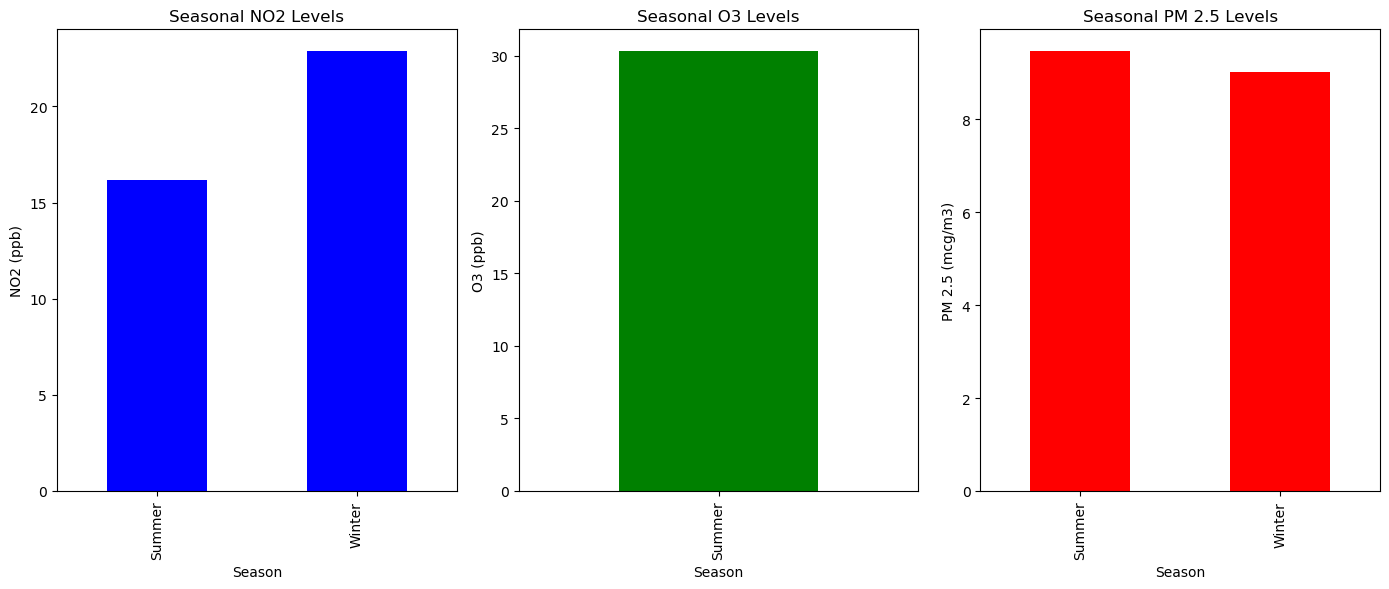

In [11]:
import matplotlib.pyplot as plt

# Plot the seasonal patterns
plt.figure(figsize=(14, 6))

# Plot for NO2
plt.subplot(1, 3, 1)
seasonal_no2.plot(kind='bar', color='b')
plt.title('Seasonal NO2 Levels')
plt.xlabel('Season')
plt.ylabel('NO2 (ppb)')

# Plot for O3
plt.subplot(1, 3, 2)
seasonal_o3.plot(kind='bar', color='g')
plt.title('Seasonal O3 Levels')
plt.xlabel('Season')
plt.ylabel('O3 (ppb)')

# Plot for PM 2.5
plt.subplot(1, 3, 3)
seasonal_pm25.plot(kind='bar', color='r')
plt.title('Seasonal PM 2.5 Levels')
plt.xlabel('Season')
plt.ylabel('PM 2.5 (mcg/m3)')

plt.tight_layout()
plt.show()

In [12]:
# Check the number of records for each season in NO2 data
no2_counts = no2_data['Season'].value_counts()
print("NO2 counts per season:\n", no2_counts)

# Check the number of records for each season in O3 data
o3_counts = o3_data['Season'].value_counts()
print("O3 counts per season:\n", o3_counts)

# Check the number of records for each season in PM 2.5 data
pm25_counts = pm25_data['Season'].value_counts()
print("PM 2.5 counts per season:\n", pm25_counts)

NO2 counts per season:
 Season
Winter    3948
Summer    1974
Name: count, dtype: int64
O3 counts per season:
 Season
Summer    2115
Name: count, dtype: int64
PM 2.5 counts per season:
 Season
Winter    3948
Summer    1974
Name: count, dtype: int64
